# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [7]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [8]:
# Number of houses in the dataset
total_houses = city_data.data.size/13

# Number of features in the dataset
total_features =len(city_data.feature_names)

# Minimum housing value in the dataset
minimum_price = city_data.target.min()

# Maximum housing value in the dataset
maximum_price = city_data.target.max()

# Mean house value of the dataset
mean_price = city_data.target.mean()

# Median house value of the dataset
median_price = np.median(city_data.target)

# Standard deviation of housing values of the dataset
std_dev = np.std(city_data.target)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **
1. DIS：the distance to employment centers.The closer to working centers, the more convenient for residents to go to work and the more popular among people.
2. RM: Normally, people care about the rooms in the houses because they need to arrange seperate rooms for children.
3. Tax: the more you paid for the tax, the less likely for people to buy the house.

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [9]:
chosen_features = ['DIS','RM','TAX']
features = city_data.feature_names.tolist()
for feature in chosen_features:
    index = features.index(feature)
    print feature, CLIENT_FEATURES[0][index]

DIS 1.385
RM 5.609
TAX 680.0


**Answer: **

DIS 1.385
RM 5.609
TAX 680.0

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [10]:
# Put any import statements you need for this code block here

from sklearn.cross_validation import train_test_split
# the train_test_split is used to split data
def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


I import a new library to split the data

## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
If our data is trsutworthy data and perfectly relects the features, then we do not need to split the data. However, in reality, that is hardly possible and normally, we have outliers in the data. When fitting the data, we know exactly what has happend, however, when predicting the data, we have no idea about the what will exactly happen in the future.

But we need to test how well is our model. The reason behind this is quite straighforward. Without testing the model performance, how can we know the model is suitable and nevertheless apply the model in reality. Since no one knows what will happen in the future, we just split the available data into two parts and use the testing data as future data. We test our model on test data and make decisions based on performance on test data. When we talk about performance we actually wander is there overfitting problems? Are predictions close to true outcomes? If not, what is the error? Through splitting data into training and testing, we can easily have an idea about the reliability of our model. As we assume that the features are stable, if the model perform well on testing data, so does on future.

What we have to be cautions here is that we must shuffle the data randomly. If we split the data as the first half and last half, we do a bad shuffle.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [11]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
I decide to choose MSE and that is why I import mean_squared_error
The price in constant so it is unappropriate to use Classification metrics.
MSE = sum of error square
MAE = sum of absolute value of errors
Both MAE and MSE measure how the predictions are difference from the true value. But the main difference is that MAE gives the equal weight of large and small error while MSE gives a higher weight to large errors. As we don't care slight error as much as large error and that is why I choose MSE.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [12]:
# Put any import statements you need for this code block
from sklearn import grid_search
from sklearn.metrics import make_scorer
def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error,greater_is_better=False)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor, parameters,scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!",reg.get_params()['max_depth']
except Exception as e:
    print "Something went wrong with fitting a model.",e

Successfully fit a model! 4


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **
grid search is a algorithm that helps us to identify which parameters is best according to scoring functions. At the first time to build a model, we have no idea about which parameters are best to minimize the error, and thus by using grid search we can easily choose the best parameters. Besides, grid_search.GridSearchCV provides us detailed error information of the combination of parameters. For example, if we have two parameters{'kernal':'rbf','linear','gamma': [0.001, 0.0001]}, this model automatically produces four results(rbf&0.001,rbf&0.0001,linear&0.001,linear&0.0001).

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **
Cross-validation is to use a large propotion of the data as the training data and then use the rest as test data. 
The error produced in Cross-Validation is stable and when train and test data is constant when applying different parameters, thus the results of error can reflect the effectiveness of parameters.

When cross-validation is used with grid search, the machine actually does two things:
1.test the modle on combination of various parameters                       
2.evaluate which one is best on testing data according to the setting make_scorer function

The reason why we have to do a cross-validation include reasons for split data that has already been discussed in Question 3. In addition to that, cross-validation is an iterative process where train/test sets are different for multiple times. In the case of 3 fold, the data is randomly seperated into 3 fold, I name them ABC. Firstly, take the A fold as test data,BC as training data; secondly, take B as test and AC as traing; thirdly, take C as test and AB as training set. For each of the tree steps, the model records the accuracy and finnaly print out the average accuracy of 3 times. In other words, train_and_test split is more likely to be a one-time process but cross-validation is a multiple times valuation.
By using cross-validation and grid search, we train parameters on training data and test its effectiveness on testing data. We compare the inner and outer performance cross validation and evaluate the overfitting problem.


# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [13]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [14]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()


# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/Users/houxiaohui/anaconda/envs/dato-env/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


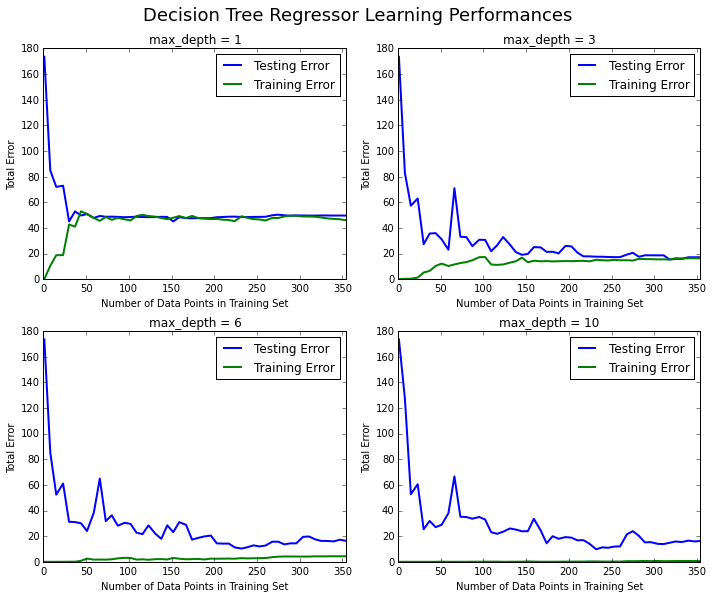

In [15]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **
The max depth for the chosen model is 6. The training error increases slightly as the training size increases and the traning error decreases dramatically as the training set increases.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **
Max depth 1: It suffers from high bias since both test and traning error are high.
Max depth 2: It suffers from high variance since the training error is really low but testing error is relatively high, and that may be the resutls of overfitting.

Creating a model complexity graph. . . 


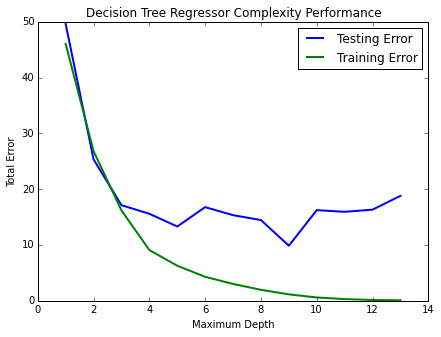

In [16]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
As the max depth increases, the traning error decrease promptly, but the testing error decreases firstly and then increases slighty. According to the graph showing above, it seems that max depth is around 6 because at this point, the testing error is minimum.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

#Why I change the original code in Question 10
As we need to run the code for several times in order to eliminate outliners' effect. Instead of running fit_model(housing_features, housing_targets), I shuffle the data and run fit_model for 999 times use the median of 999 results.

In [20]:
best = []
for i in range(1,1000):
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    reg = fit_model(X_train, y_train)
    best.append(reg.get_params()['max_depth'])

print "Final model has an optimal max_depth parameter of", np.median(best)

Final model has an optimal max_depth parameter of 6.0


**Answer: ** the best parameters of max depth is 6.0

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

#Interpretation Question11
According to Answer 10, the best estimator is 5. I use max_depth 5 as a parameters to fit all data and predict the result

In [21]:
def depth5_results(X):
    regressor = DecisionTreeRegressor(max_depth=6)
    reg.fit(housing_features, housing_prices)
    return reg.predict(X)

In [22]:
sale_price = depth5_results(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 21.630


#How does this selling price compare to the basic statistics you calculated on the dataset?

In [23]:
print (sale_price[0]-median_price)<std_dev

True


The sale_price[0] minus median price is less than one standard deviation and thus the result is reasonable.

**Answer: **Predicted value of client's home: 20.968

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: ** 
No. As seen in the learning_curves graph, no matter how the max_depth change, the testing error is high and much higher than training error. Although applying the entire dataset in decisiontree model, I do not believe this model will produce a good prediction. Neverthless, in this case, we have no idea to check testing error since no testint data set.
The poor performance on the testing set may be a result of outliers. Before we apply the data into the model, we can firstly drop the outliers. One way to do this is the draw a scatter plot and then pick out the outliers. Another way to do this is to assume each feature distributes normally.We make sure 95% of data is used and the rest 5% on the left and right side of Gaussian distribution can be dropped.
Instead of using DecisionTree model, KNN may be better to fit the data. KNN model predicts results according to the nearests datapoint.Moreover, in the boston prices case, all data is given in numbers and in reality, houses that are close have similar prices.
Therefore, in my opinion, the decision tree model is not suitable for predicting sales price and KNN may have a better predictions.